# PART A
- **DOMAIN**: Entertainment
- **CONTEXT**: Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription basis.
Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on the movie
and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer vision and
multimedia experts who need to detect faces from screen shots from the movie scene.
The data labelling is already done. Since there higher time complexity is involved in the
- **DATA DESCRIPTION**: The dataset comprises of images and its mask for corresponding human face.
- **PROJECT OBJECTIVE**: To build a face detection system.

In [2]:
# Importing Key Libraries

import numpy as np

import pandas as pd

#

import warnings; warnings.simplefilter('ignore')

#
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

#
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import random
random.seed(0)

pd.set_option('display.float_format', lambda x: '%.2f' % x) # To supress numerical display in scientific notations
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
data_A = np.load('C:/Users/aanand1/Python_Intro/Computer Vision/Project/images.npy', allow_pickle=True)

In [4]:
data_A.shape

(409, 2)

In [5]:
data_A[0]

array([array([[[42, 37, 34],
               [56, 51, 48],
               [71, 66, 63],
               ...,
               [23, 33, 34],
               [26, 36, 37],
               [28, 38, 39]],

              [[40, 35, 32],
               [51, 46, 43],
               [64, 59, 56],
               ...,
               [27, 36, 35],
               [24, 33, 32],
               [26, 35, 34]],

              [[43, 38, 35],
               [51, 46, 43],
               [61, 56, 53],
               ...,
               [28, 30, 27],
               [33, 35, 32],
               [35, 37, 34]],

              ...,

              [[56, 47, 40],
               [57, 48, 41],
               [61, 52, 45],
               ...,
               [67, 48, 42],
               [55, 35, 28],
               [60, 40, 33]],

              [[53, 44, 37],
               [54, 45, 38],
               [57, 48, 41],
               ...,
               [59, 40, 34],
               [60, 40, 33],
               [54, 34, 27]],



In [6]:
data_A[0][0]

array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8)

In [7]:
data_A[0][1]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
   {'x': 0.1723076923076923, 'y': 0.45345345345345345}],
  'imageWidth': 650,
  'imageHeight': 333},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
   {'x': 0.6584615384615384, 'y': 0.46846846846846846}],
  'imageWidth': 650,
  'imageHeight': 333}]

In [8]:
images = data_A[:,0]
masks = data_A[:,1]
images.shape
masks.shape

(409,)

(409,)

In [9]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

In [10]:
Y = np.zeros((int(data_A.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data_A.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
print("Shape of X:", X.shape)

Shape of X: (409, 224, 224, 3)


In [11]:
import tensorflow
tensorflow.__version__

'2.16.1'

In [12]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
import cv2

for index in range(data_A.shape[0]):
    img = data_A[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data_A[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        Y[index][y1:y2, x1:x2] = 1

In [13]:
X.shape

(409, 224, 224, 3)

In [14]:
Y.shape

(409, 224, 224)

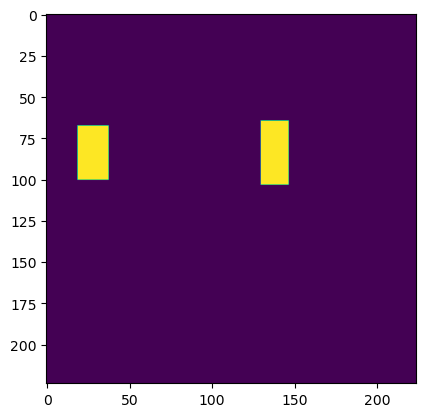

In [15]:
plt.imshow(Y[0])

In [16]:
# X_train = X[:400]
# y_train = Y[:400]
# X_test = X[400:]
# y_test = Y[400:]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=9/409, random_state=9)

In [17]:
print ('X_train Shape:',X_train.shape)
print ('X_test Shape:',X_test.shape)
print ('y_train Shape:',y_train.shape)
print ('y_test Shape:',y_test.shape)

X_train Shape: (400, 224, 224, 3)
X_test Shape: (9, 224, 224, 3)
y_train Shape: (400, 224, 224)
y_test Shape: (9, 224, 224)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


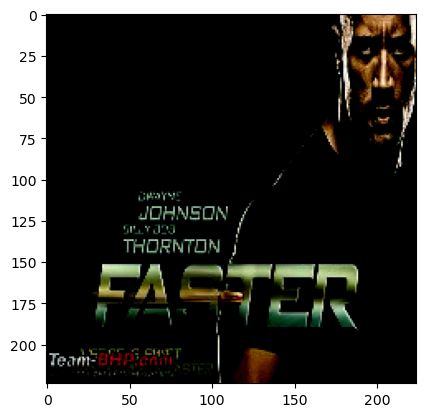

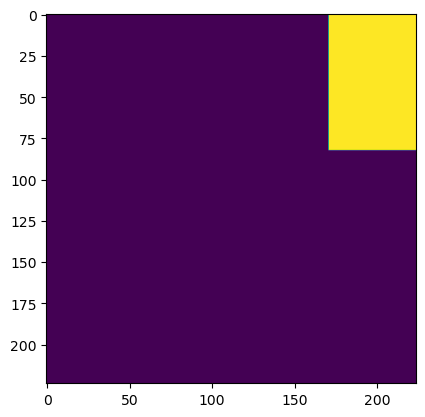

In [18]:
import random
n=random.randint(0,399)
plt.imshow(X_train[n])
plt.show()
plt.imshow(y_train[n])
plt.show()

- **We will use MobileNet as the base model**
  - input_shape: 224, 224, 3
  - include_top: False
  - alpha: 1
  - Weights: Imagenet
- **Skip Connections to get UNet architecture**

**Getting the MobileNet architecture**

In [19]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model
model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")
model.summary()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

**Defining the Model**

In [20]:
def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable

    block0 = model.get_layer("conv_pw_1_relu").output
    block1 = model.get_layer("conv_pw_3_relu").output
    block2 = model.get_layer("conv_pw_5_relu").output
    block3 = model.get_layer("conv_pw_11_relu").output
    block4 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block4), block3])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block2])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block1])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block0])
    print(x.shape)
    x = UpSampling2D()(x)
    print(x.shape)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)
    print(x.shape)

    return Model(inputs=model.input, outputs=x)

In [21]:
model = create_model(False)
model.summary()

(None, 14, 14, 1536)
(None, 28, 28, 1792)
(None, 56, 56, 1920)
(None, 112, 112, 1984)
(None, 224, 224, 1984)
(None, 224, 224)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv_dw_1 (DepthwiseConv2D)   │ (None, 112, 112, 32)      │             288 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv_dw_1_bn                  │ (None, 112, 112, 32)      │             128 │ conv_dw_1[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv_dw_1_relu (ReLU)         │ (None, 112, 112, 32)      │               0 │ conv_dw_1_bn[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv_pw_1 (Conv2D)            │ (None, 112, 112, 64)      │           2,048 │ conv_dw_1_relu[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv_pw_1_bn                  │ (None, 112, 112, 64)      │             256 │ conv_pw_1[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv_pw_1_relu (ReLU)         │ (None, 112, 112, 64)      │               0 │ conv_pw_1_bn[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv_pad_2 (ZeroPadding2D)    │ (None, 113, 113, 64)      │               0 │ conv_pw_1_relu[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv_dw_2 (DepthwiseConv2D)   │ (None, 56, 56, 64)        │             576 │ conv_pad_2[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv_dw_2_bn                  │ (None, 56, 56, 64)        │             256 │ conv_dw_2[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv_dw_2_relu (ReLU)         │ (None, 56, 56, 64)        │               0 │ conv_dw_2_bn[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv_pw_2 (Conv2D)            │ (None, 56, 56, 128)       │           8,192 │ conv_dw_2_relu[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv_pw_2_bn                  │ (None, 56, 56, 128)       │             51

 Total params: 3,230,849 (12.32 MB)

 Trainable params: 1,985 (7.75 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

**Dice Coefficient**

In [22]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tensorflow.keras.backend.epsilon())

**Loss Function**

In [23]:
from tensorflow.keras.losses import binary_crossentropy
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tensorflow.keras.backend.log(dice_coefficient(y_true, y_pred) + tensorflow.keras.backend.epsilon())

**Compiling the Model**

In [26]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

optimizer = Adam(learning_rate=1e-2)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

**Callbacks**

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

#checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True, save_weights_only=True, mode="min")
stop = EarlyStopping(monitor="loss", patience=10)

reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.1, patience=2, min_lr=1e-8, verbose=1)

**Fitting the Model**

In [30]:
history=model.fit(X_train, y_train, epochs=40, batch_size=1, callbacks=[reduce_lr, stop])

Epoch 1/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 98s 244ms/step - dice_coefficient: 0.5905 - loss: 1.2422 - learning_rate: 0.0100
Epoch 2/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 101s 252ms/step - dice_coefficient: 0.6010 - loss: 1.2804 - learning_rate: 0.0100
Epoch 3/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 96s 240ms/step - dice_coefficient: 0.6059 - loss: 1.2942 - learning_rate: 0.0100
Epoch 4/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 92s 229ms/step - dice_coefficient: 0.6137 - loss: 1.1975 - learning_rate: 0.0100
Epoch 5/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 96s 240ms/step - dice_coefficient: 0.6250 - loss: 1.2527 - learning_rate: 0.0100
Epoch 6/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - dice_coefficient: 0.6198 - loss: 1.2761
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
400/400 ━━━━━━━━━━━━━━━━━━━━ 95s 238ms/step - dice_coefficient: 0.6198 - loss: 1.2760 - learning_rate: 0.0100
Epoch 7/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 121s 302ms/step - dice_coefficient: 0.6645 - loss: 1.0660 - learning_rat

In [31]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - dice_coefficient: 0.6778 - loss: 0.7578


[0.7578379511833191, 0.6778082847595215]

**Training Loss and Validation vs Epoch**

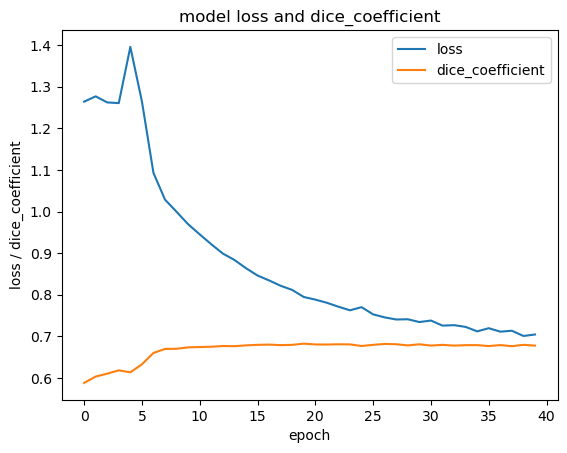

In [32]:
_=plt.plot(history.history['loss'])
_=plt.plot(history.history['dice_coefficient'])
_=plt.title('model loss and dice_coefficient')
_=plt.ylabel('loss / dice_coefficient')
_=plt.xlabel('epoch')
_=plt.legend(['loss', 'dice_coefficient'], loc='best')
_=plt.show()

**Observations on the model**
- The training and test loss are 0.69 and 0.75 respectively
- The Dice Coefficient for both training and test is 0.67
- Based on the difference on the performance between training and test we can say the model is slightly overfit

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


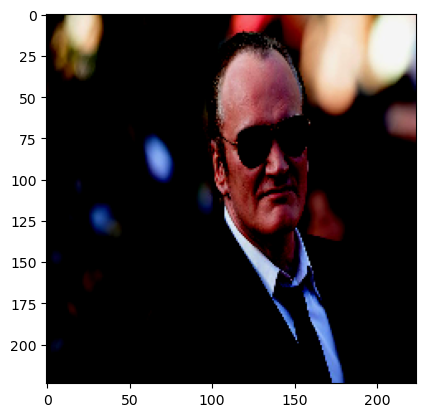

In [33]:
plt.imshow(X_test[3])

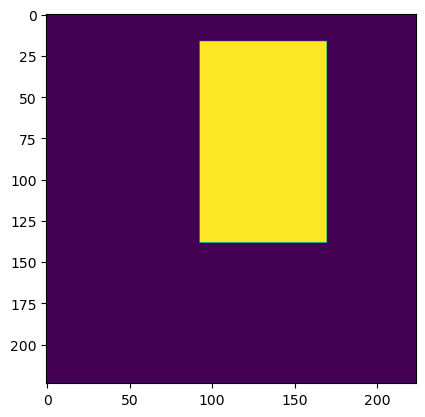

In [34]:
plt.imshow(y_test[3])

**Predicting the mask on the test image**

In [35]:
predicted_mask = cv2.resize(1.0 * (model.predict(x=np.array([X_test[3]]))[0] > 0.5), (IMAGE_WIDTH, IMAGE_HEIGHT))

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


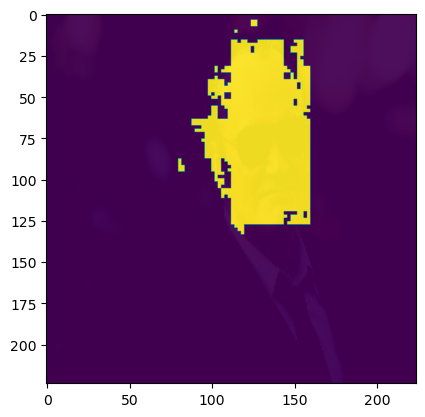

In [36]:
plt.imshow(X_test[3])
plt.imshow(predicted_mask, alpha=0.95)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


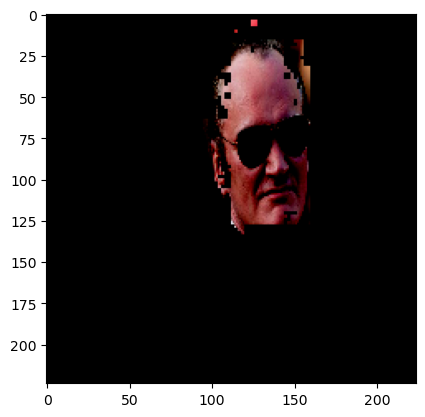

In [37]:
image = cv2.resize(X_test[3], (IMAGE_WIDTH, IMAGE_HEIGHT))

pred_mask = cv2.resize(1.0*(model.predict(x=np.array([X_test[3]]))[0] > 0.5), (IMAGE_WIDTH,IMAGE_HEIGHT))

image2 = image
image2[:,:,0] = pred_mask*image[:,:,0]
image2[:,:,1] = pred_mask*image[:,:,1]
image2[:,:,2] = pred_mask*image[:,:,2]

out_image = image2

plt.imshow(out_image)